# Pandas challenges

Read the `veahicles.csv` dataframe and store it in a variable called `cars`:

In [10]:
# code here
import pandas as pd

cars = pd.read_csv('data/vehicles.csv')

In [120]:
#create a copy of the dataframe, otherwise it would only be an alias and you would do everything on the original df
temp = cars.copy()

In [115]:
#use help() to get help for a python method
help(cars.info)

Help on method info in module pandas.core.frame:

info(verbose: 'Optional[bool]' = None, buf: 'Optional[IO[str]]' = None, max_cols: 'Optional[int]' = None, memory_usage: 'Optional[Union[bool, str]]' = None, show_counts: 'Optional[bool]' = None, null_counts: 'Optional[bool]' = None) -> 'None' method of pandas.core.frame.DataFrame instance
    Print a concise summary of a DataFrame.
    
    This method prints information about a DataFrame including
    the index dtype and columns, non-null values and memory usage.
    
    Parameters
    ----------
    data : DataFrame
        DataFrame to print information about.
    verbose : bool, optional
        Whether to print the full summary. By default, the setting in
        ``pandas.options.display.max_info_columns`` is followed.
    buf : writable buffer, defaults to sys.stdout
        Where to send the output. By default, the output is printed to
        sys.stdout. Pass a writable buffer if you need to further process
        the output.


# Explore the dataset:

- How many rows and columns are there?

In [105]:
#how many rows and columns
#rows, columns
cars.shape

(35952, 17)

- What are the data types of the columns?

In [11]:
# code here
#how many rows - 35952 - data types see Dtype - no missing values (non-null)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

- Are there missing values?

In [12]:
#missing values, axis = 1 would do the check for each row
cars.isna().sum(axis=0)

Make                       0
Model                      0
Year                       0
Engine Displacement        0
Cylinders                  0
Transmission               0
Drivetrain                 0
Vehicle Class              0
Fuel Type                  0
Fuel Barrels/Year          0
City MPG                   0
Highway MPG                0
Combined MPG               0
CO2 Emission Grams/Mile    0
Fuel Cost/Year             0
dtype: int64

- What are the ranges / distributions of the numerical columns?

In [13]:
#what are the ranges / distributions of the numerical columns
cars.describe()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
count,35952.00000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000
mean,2000.71640,3.338493,5.765076,17.609056,17.646139,23.880646,19.929322,475.316339,1892.598465
std,10.08529,1.359395,1.755268,4.467283,4.769349,5.890876,5.112409,119.060773,506.958627
min,1984.00000,0.600000,2.000000,0.060000,6.000000,9.000000,7.000000,37.000000,600.000000
25%,1991.00000,2.200000,4.000000,14.699423,15.000000,20.000000,16.000000,395.000000,1500.000000
50%,2001.00000,3.000000,6.000000,17.347895,17.000000,24.000000,19.000000,467.736842,1850.000000
75%,2010.00000,4.300000,6.000000,20.600625,20.000000,27.000000,23.000000,555.437500,2200.000000
max,2017.00000,8.400000,16.000000,47.087143,58.000000,61.000000,56.000000,1269.571429,5800.000000


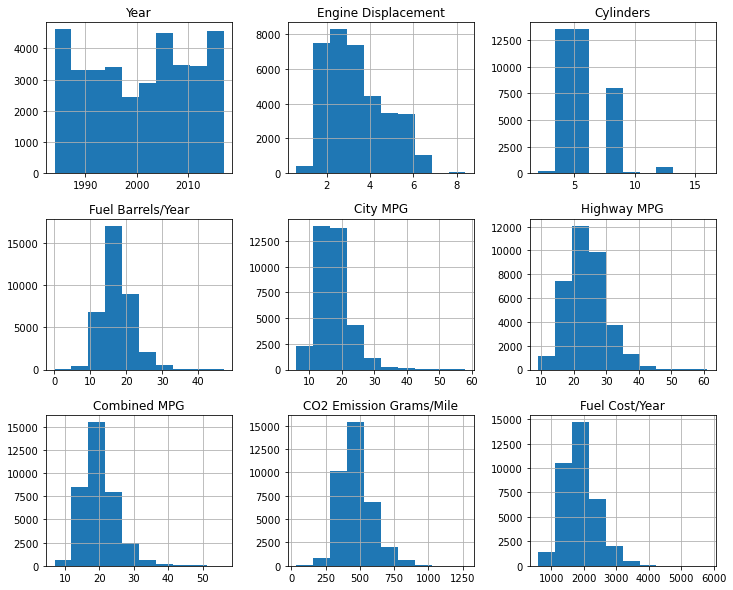

In [4]:
cars.hist(figsize=(12, 10));

- What are the value counts for the categorical columns?

In [14]:
#use describe to describe categorical data 
cars.describe(include = 'object')

,Make,Model,Transmission,Drivetrain,Vehicle Class,Fuel Type
count,35952,35952,35952,35952,35952,35952
unique,127,3608,45,8,34,13
top,Chevrolet,F150 Pickup 2WD,Automatic 4-spd,Front-Wheel Drive,Compact Cars,Regular
freq,3643,197,10585,13044,5185,23587


In [20]:
#count values of categorical data - do like this for every column with categorical data (Make, Model, Transmission, Drivetrain, Vehicle Class, Fuel Type)
print(cars.Make.value_counts())

Chevrolet                 3643
Ford                      2946
Dodge                     2360
GMC                       2347
Toyota                    1836
                          ... 
Fisker                       1
JBA Motorcars, Inc.          1
Qvale                        1
Lambda Control Systems       1
London Coach Co Inc          1
Name: Make, Length: 127, dtype: int64


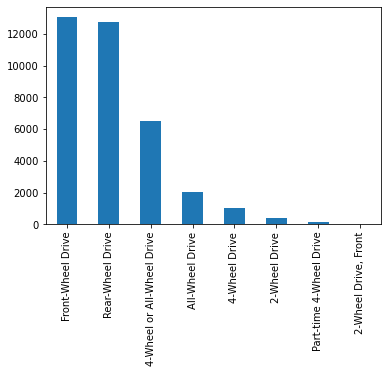

In [5]:
cars["Drivetrain"].value_counts().plot.bar();

### Drop the column "Highway MPG"

In [15]:
#create a copy of the dataframe, otherwise it would only be an alias and you would do everything on the original df
temp = cars.copy()

In [16]:
# code here - df.drop works for rows (0) and columns (1) as second attribute, use inplace = True to change original df
temp.drop('Combined MPG', axis = 1, inplace = True)

In [17]:
#drop works also for rows
temp.drop([0,2], axis=0)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,683.615385,2550
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,555.437500,2550
5,Acura,2.2CL/3.0CL,1997,2.2,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,20,26,403.954545,1500
6,Acura,2.2CL/3.0CL,1997,2.2,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,13.733750,22,28,370.291667,1400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,246.000000,1100


### Change column names so that there are no names with spaces or weird special characters:

In [50]:
# rename by defining new names for all columns, use rename to rename only single column names
#use df.rename(function) to use a function to map new column names e.g. df.rename(str.lower) 
cars.columns = ['Make', 'Model', 'Year', 'Engine_Displacement',
       'Cylinders', 'Transmission', 'Drivetrain', 'Vehicle_Class', 'Fuel_Type',
       'Fuel_Barrels_Year', 'City_MPG', 'Highway_MPG', 'CO2_Emission_Grams_Mile',
       'Fuel_Cost_Year']

In [18]:
# other method using list comprehension and replace function to rename column names
cars.columns = [col.replace(' ', '_').replace("/", "_per_").lower() for col in cars.columns]
print(cars.columns)

Index(['make', 'model', 'year', 'engine_displacement', 'cylinders',
       'transmission', 'drivetrain', 'vehicle_class', 'fuel_type',
       'fuel_barrels_per_year', 'city_mpg', 'highway_mpg', 'combined_mpg',
       'co2_emission_grams_per_mile', 'fuel_cost_per_year'],
      dtype='object')


### What brand has the most cars?

In [129]:
# code here - Chevrolet has the most cars
cars.make.value_counts().head()
#cars["make"].value_counts().head(1)
#cars["make"].value_counts().sort_values(ascending = False)[0:1]

Chevrolet    3643
Ford         2946
Dodge        2360
GMC          2347
Toyota       1836
Name: make, dtype: int64

In [21]:
cars.groupby("make")["make"].count().sort_values(ascending=False)

make
Chevrolet                             3643
Ford                                  2946
Dodge                                 2360
GMC                                   2347
Toyota                                1836
                                      ... 
Excalibur Autos                          1
S and S Coach Company  E.p. Dutton       1
Environmental Rsch and Devp Corp         1
E. P. Dutton, Inc.                       1
Lambda Control Systems                   1
Name: make, Length: 127, dtype: int64

### how to filter the data for a brand e.g. Chevrolet

In [20]:
cars.loc[cars['make'] == "Chevrolet", :].head()

,make,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrels_per_year,city_mpg,highway_mpg,combined_mpg,co2_emission_grams_per_mile,fuel_cost_per_year
4275,Chevrolet,Astro 2WD (cargo),1985,2.5,4.0,Manual 4-spd,Rear-Wheel Drive,Vans,Regular,16.480500,19,22,20,444.350000,1650
4276,Chevrolet,Astro 2WD (cargo),1985,4.3,6.0,Automatic 4-spd,Rear-Wheel Drive,Vans,Regular,19.388824,15,20,17,522.764706,1950
4277,Chevrolet,Astro 2WD (cargo),1985,4.3,6.0,Manual 4-spd,Rear-Wheel Drive,Vans,Regular,20.600625,15,17,16,555.437500,2100
4278,Chevrolet,Astro 2WD (cargo),1985,4.3,6.0,Manual 5-spd,Rear-Wheel Drive,Vans,Regular,19.388824,15,19,17,522.764706,1950
4279,Chevrolet,Astro 2WD (cargo),1985,2.5,4.0,Automatic 4-spd,Rear-Wheel Drive,Vans,Regular,16.480500,18,24,20,444.350000,1650


In [24]:
target_brand = "smart"
cars.query("make == @target_brand").head()

,make,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrels_per_year,city_mpg,highway_mpg,combined_mpg,co2_emission_grams_per_mile,fuel_cost_per_year
35932,smart,fortwo cabriolet,2010,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,33,41,36,246.861111,1100
35933,smart,fortwo cabriolet,2011,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,33,41,36,246.861111,1100
35934,smart,fortwo cabriolet,2012,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,246.861111,1100
35935,smart,fortwo cabriolet,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35936,smart,fortwo cabriolet,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100


### What brand has the worse CO2 Emissions on average?

In [133]:
# code here
cars.groupby('make')["co2_emission_grams_per_mile"].mean().sort_values(ascending=False).head()

make
Vector                                1049.159722
Superior Coaches Div E.p. Dutton       888.700000
S and S Coach Company  E.p. Dutton     888.700000
Bugatti                                873.062500
Laforza Automobile Inc                 807.909091
Name: co2_emission_grams_per_mile, dtype: float64

In [135]:
#or use .agg function - with .agg you can apply different functions 
cars.groupby("make").agg({"co2_emission_grams_per_mile":"mean"}).sort_values(by="co2_emission_grams_per_mile", ascending = False)

,co2_emission_grams_per_mile
make,
Vector,1049.159722
Superior Coaches Div E.p. Dutton,888.700000
S and S Coach Company E.p. Dutton,888.700000
Bugatti,873.062500
Laforza Automobile Inc,807.909091
...,...
MINI,313.716862
Daihatsu,310.188060
Fiat,304.666560


In [160]:
cars.groupby("make").agg({"co2_emission_grams_per_mile": ["mean", "sum"]}).sort_values(by=("co2_emission_grams_per_mile","mean"), ascending = False)

co2_emission_grams_per_mile               
                                                          mean            sum
make                                                                         
Vector                                             1049.159722    4196.638889
Superior Coaches Div E.p. Dutton                    888.700000     888.700000
S and S Coach Company  E.p. Dutton                  888.700000     888.700000
Bugatti                                             873.062500    6984.500000
Laforza Automobile Inc                              807.909091    1615.818182
...                                                        ...            ...
MINI                                                313.716862  100389.395886
Daihatsu                                            310.188060    5273.197023
Fiat                                                304.666560   13100.662059
smart                                               247.030556    4940.611111
Fisker                                              169.000000     169.000000

[127 rows x 2 columns]

## Which brands are more environment friendly?

In [69]:
# code here
cars["City_MPG_CO2"] = cars["City-MPG"] * cars["CO2-Emission-Grams-Mile"]
cars.groupby("Make").City_MPG_CO2.mean().sort_values(ascending=True)

Make
Fisker                    3380.000000
Mobility Ventures LLC     6877.000000
Bugatti                   6984.500000
VPG                       6990.958205
Aurora Cars Ltd           7109.600000
                             ...     
AM General                9017.691176
Vixen Motor Company       9543.750000
Mahindra                  9671.000000
London Taxi               9717.272727
Grumman Olson            10097.903226
Name: City_MPG_CO2, Length: 127, dtype: float64

### Create 4 groups (bins) of cars, by Year. We want to explore how cars have evolved decade by decade.

In [30]:
# code here - use cut to define bins
cars["decades"] = pd.cut(cars["year"], bins = [1980, 1990, 2000, 2010, 2020], labels = ["80s", "90s", "00s", "10s"])

In [147]:
# have a look at the description of the year column
cars["year"].describe()

count    35952.00000
mean      2000.71640
std         10.08529
min       1984.00000
25%       1991.00000
50%       2001.00000
75%       2010.00000
max       2017.00000
Name: year, dtype: float64

In [32]:
#use qcut to use quantiles to define the bins in similar groups
cars["year_range"] = pd.qcut(cars["year"], q=4, labels=["80s", "90s", "00s", "10s"])
sample = cars.sample(5)
sample

,make,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrels_per_year,city_mpg,highway_mpg,combined_mpg,co2_emission_grams_per_mile,fuel_cost_per_year,year_range,decades
22573,Mazda,626,2000,2.0,4.0,Automatic 4-spd,Front-Wheel Drive,Midsize Cars,Regular,14.982273,19,25,22,403.954545,1500,90s,90s
35469,Volvo,S40 FWD,2004,1.9,4.0,Automatic 5-spd,Front-Wheel Drive,Compact Cars,Premium,14.982273,19,27,22,403.954545,1850,00s,00s
18032,Hyundai,Santa Fe 2WD,2005,2.4,4.0,Automatic 4-spd,Front-Wheel Drive,Sport Utility Vehicle - 2WD,Regular,16.480500,18,24,20,444.350000,1650,00s,00s
24368,Mercedes-Benz,S65 AMG,2010,6.0,12.0,Automatic 5-spd,Rear-Wheel Drive,Large Cars,Premium,25.354615,11,17,13,683.615385,3100,00s,00s
24187,Mercedes-Benz,ML400 4matic,2015,3.0,6.0,Automatic 7-spd,4-Wheel Drive,Standard Sport Utility Vehicle 4WD,Premium,16.480500,18,22,20,454.000000,2000,10s,10s


### Did cars consume more gas in the eighties?

In [100]:
# code here
cars.groupby("decades")["Fuel-Barrels-Year"].mean().reset_index()

,decades,Fuel-Barrels-Year
0,1980s,18.573337
1,1990s,18.118023
2,2000s,17.746681
3,2010s,15.453011


### Do cars with automatic transmission consume more fuel than cars with manual transmission?

In [152]:
# code here
# in the next notebook, we will learn how we can clean the "Trans" column
cars["transmission"].unique()

array(['Automatic 3-spd', 'Automatic 4-spd', 'Manual 5-spd',
       'Automatic (S5)', 'Manual 6-spd', 'Automatic 5-spd', 'Auto(AM8)',
       'Auto(AM-S8)', 'Auto(AV-S7)', 'Automatic (S6)', 'Automatic (S9)',
       'Automatic (S4)', 'Auto(AM-S9)', 'Automatic (S7)', 'Auto(AM7)',
       'Auto(AM-S7)', 'Auto(AM6)', 'Automatic 6-spd', 'Manual 4-spd',
       'Automatic (S8)', 'Manual(M7)', 'Auto(AM-S6)',
       'Automatic (variable gear ratios)', 'Automatic (AV)',
       'Auto(AV-S8)', 'Automatic (AM6)', 'Automatic 8-spd', 'Auto(A1)',
       'Automatic (A1)', 'Automatic (A6)', 'Auto(AV-S6)', 'Manual 3-spd',
       'Manual 7-spd', 'Automatic 9-spd', 'Auto (AV)', 'Automatic 6spd',
       'Auto(L4)', 'Auto(L3)', 'Auto (AV-S6)', 'Auto (AV-S8)',
       'Automatic (AV-S6)', 'Automatic 7-spd', 'Manual 5 spd',
       'Auto(AM5)', 'Automatic (AM5)'], dtype=object)

In [34]:
# return check as else to be able to see wether all conditions are met in if en elif statement 
def transmission_type(string):
    if "auto" in string.lower():
        return "automatic"
    elif "manual" in string.lower():
        return "manual"
    else:
        return "check"

cars["trans_type"] = [transmission_type(trans) for trans in cars["transmission"]]
cars.groupby(["trans_type"])["trans_type"].count()

trans_type
automatic    24290
manual       11662
Name: trans_type, dtype: int64

In [35]:
cars.groupby("trans_type")[["city_mpg", "highway_mpg"]].mean()

,city_mpg,highway_mpg
trans_type,,
automatic,17.119638,23.245080
manual,18.742754,25.204425


In [36]:
#or another option
cars.groupby("trans_type").agg({"city_mpg":"mean", "highway_mpg":"mean", "fuel_barrels_per_year":"mean"})

,city_mpg,highway_mpg,fuel_barrels_per_year
trans_type,,,
automatic,17.119638,23.245080,18.043152
manual,18.742754,25.204425,16.704904


### Group cars by fuel type and aggregate them by the following criteria: 

- The maximum number cylinders
- The oldest year
- The average Miles Per Gallon in the city

In [159]:
# code here
cars.groupby(["fuel_type"]).agg({"cylinders":"max", "year": "min", "city_mpg":'mean'}, axis = 0)

,cylinders,year,city_mpg
fuel_type,,,
CNG,8.0,1993,15.966667
Diesel,10.0,1984,21.173436
Gasoline or E85,8.0,2000,15.347280
Gasoline or natural gas,8.0,2000,13.700000
Gasoline or propane,8.0,2001,12.000000
Midgrade,8.0,2011,14.851351
Premium,16.0,1985,16.793166
Premium Gas or Electricity,8.0,2011,30.705882
Premium and Electricity,8.0,2014,24.900000


## We want to use "Drivetrain" in a statistical model. Convert the column to numeric.

In [157]:
# code here
cars["drivetrain"].unique()

array(['2-Wheel Drive', 'Rear-Wheel Drive', 'Front-Wheel Drive',
       '4-Wheel or All-Wheel Drive', 'All-Wheel Drive', '4-Wheel Drive',
       'Part-time 4-Wheel Drive', '2-Wheel Drive, Front'], dtype=object)

In [41]:
#use get_dummies method to convert to numeric columns
dummies_drivetrain = pd.get_dummies(cars["drivetrain"])

In [42]:
pd.concat([cars, dummies_drivetrain], axis=1).drop("drivetrain", axis=1).head(3)

,make,model,year,engine_displacement,cylinders,transmission,vehicle_class,fuel_type,fuel_barrels_per_year,city_mpg,...,decades,trans_type,2-Wheel Drive,"2-Wheel Drive, Front",4-Wheel Drive,4-Wheel or All-Wheel Drive,All-Wheel Drive,Front-Wheel Drive,Part-time 4-Wheel Drive,Rear-Wheel Drive
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,Special Purpose Vehicle 2WD,Regular,19.388824,18,...,80s,automatic,1,0,0,0,0,0,0,0
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,Special Purpose Vehicle 2WD,Regular,25.354615,13,...,80s,automatic,1,0,0,0,0,0,0,0
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Special Purpose Vehicle 2WD,Regular,20.600625,16,...,80s,automatic,0,0,0,0,0,0,0,1


## Read the `car_brands.csv` data:

In [45]:
# code here
car_brands = pd.read_csv("data/car_brands.csv")
car_brands

,brand,revenue,production
0,AM General,1537,1.002916
1,ASC Incorporated,232,1.628105
2,Acura,234,3.394481
3,Alfa Romeo,1174,2.313726
4,American Motors Corporation,1230,1.231024
...,...,...,...
122,Volkswagen,273,1.033316
123,Volvo,1312,0.057454
124,Wallace Environmental,277,5.744609
125,Yugo,508,0.520953


### Join the cars dataframe with the car brands dataframe.

In [46]:
# code here
car_info = cars.merge(car_brands.rename(columns={"brand": "make"}), how = "left", on = "make")
car_info.head(5)

,make,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrels_per_year,city_mpg,highway_mpg,combined_mpg,co2_emission_grams_per_mile,fuel_cost_per_year,year_range,decades,trans_type,revenue,production
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950,80s,80s,automatic,1537,1.002916
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,80s,80s,automatic,1537,1.002916
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100,80s,80s,automatic,1537,1.002916
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,80s,80s,automatic,1537,1.002916
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550,80s,80s,automatic,232,1.628105


### Which brands have the most revenue?

In [50]:
# check if the merge has been done correctly and sum the revenues for each brand
car_info.groupby("make").agg({"revenue":"sum"}).sort_values(by="revenue", ascending=False)


,revenue
make,
Dodge,4071000
BMW,2782143
GMC,2501902
Chevrolet,1825143
Nissan,1684032
...,...
Superior Coaches Div E.p. Dutton,236
ASC Incorporated,232
"E. P. Dutton, Inc.",214
